<a href="https://colab.research.google.com/github/ashish0526/machinelearning/blob/master/ml_linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
from google.colab import files
uploaded = files.upload()

Saving ex1data1.txt to ex1data1 (1).txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['ex1data1.txt']),header=None,names=['Population','Profit'])

In [0]:
import io

In [15]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [16]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


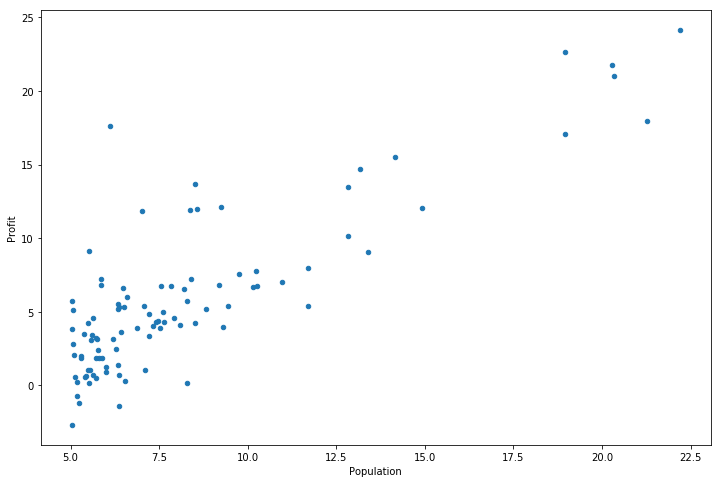

In [17]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))

In [0]:
def computeCost(X,y,theta):
  inner = np.power(((X*theta.T)-y),2)
  return np.sum(inner)/(2*len(X))

In [0]:
data.insert(0,'Ones',1)

In [20]:
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
5,1,8.3829,11.88600
6,1,7.4764,4.34830
7,1,8.5781,12.00000
8,1,6.4862,6.59870
9,1,5.0546,3.81660


In [0]:
cols = data.shape[1]

In [22]:
cols

3

In [0]:
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [24]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [25]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [0]:
X = np.matrix(X)
Y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [32]:
theta

matrix([[0, 0]])

In [33]:
X.shape,Y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [34]:
computeCost(X,y,theta)

Profit    32.072734
dtype: float64

In [0]:
def gradientDescent(X,y,theta,alpha,iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters)
  
  for i in range(iters):
    error = (X*theta.T)-y
    
    for j in  range(parameters):
      term  = np.multiply(error,X[:,j])
      temp[0,j] = temp[0,j]-((alpha/len(X))*np.sum(term))
      
    theta = temp
    cost[i] = computeCost(X,y,theta)
    
  return theta,cost  
    
  

In [0]:
alpha = 0.01
iters = 1000

In [0]:
g,cost = gradientDescent(X,y,theta,alpha,iters)

In [45]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [46]:
computeCost(X,y,g)

Profit    4.515956
dtype: float64

In [0]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f =g[0,0] + (g[0,1]*x)


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

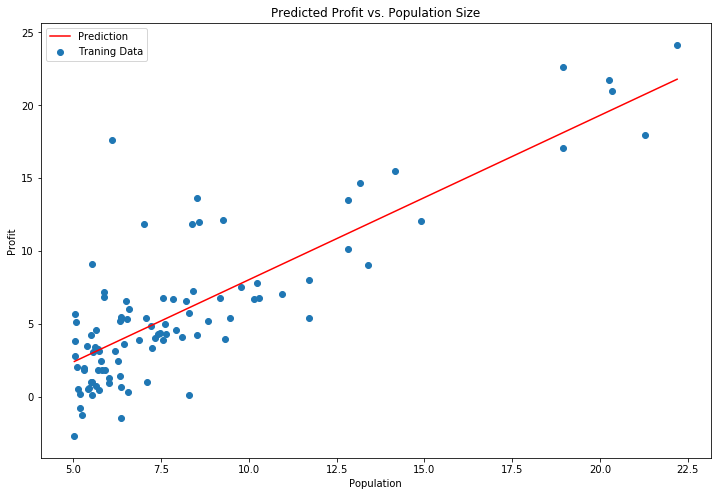

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs. Training Epoch')

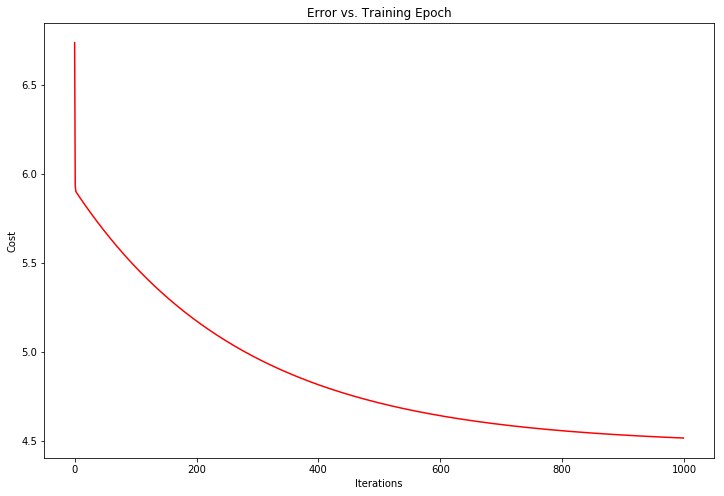

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [62]:
from google.colab import files
uploaded = files.upload()

Saving ex1_data2.txt to ex1_data2.txt


In [0]:
data2 = pd.read_csv(io.BytesIO(uploaded['ex1_data2.txt']))

In [64]:
data2.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [0]:
data2  = (data2-data2.mean())/(data2.std())

In [66]:
data2.head()

,2104,3,399900
0,-0.495977,-0.226166,-0.073110
1,0.499874,-0.226166,0.236953
2,-0.725023,-1.526618,-0.849457
3,1.246762,1.074287,1.592190
4,-0.016724,1.074287,-0.311010


In [0]:
data2.insert(0,'Ones',1)

cols = data2.shape[1]

x2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[cols-1:cols]


In [68]:
x2 = np.matrix(x2.values)
y2 = np.matrix(y2.values)

theta2 = np.matrix(np.array([0,0,0]))

g2,cost2 = gradientDescent(x2,y2,theta2,alpha,iters)

computeCost(x2,y2,g2)





0.10429870568932408

Text(0.5, 1.0, 'Error vs Training Epoch')

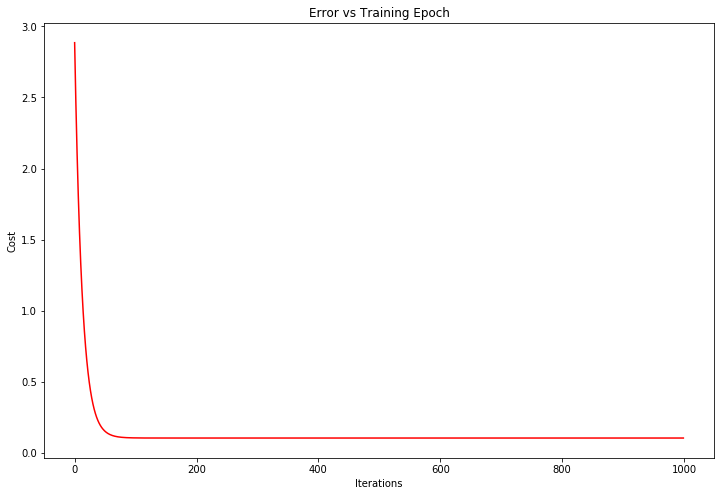

In [70]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')

In [72]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
?X[:, 1].A1

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

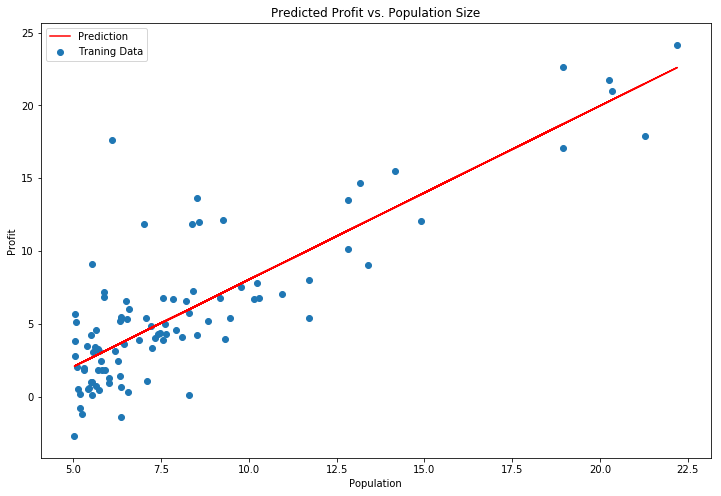

In [74]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')